In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_epochs=1000):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None
        self.errors_ = []  # storing the number of misclassifications in each epoch

In [3]:
   def fit(self, X, y):
        """
        Train the Perceptron model on the provided data.

        Parameters:
        X : array-like, shape = [n_samples, n_features]
            Training vectors.
        y : array-like, shape = [n_samples]
            Target values. Must be +1 or -1.
        """
        n_samples, n_features = X.shape
        # starting weights and bias equal zeros
        self.weights = np.zeros(n_features)
        self.bias = 0.0

        for epoch in range(self.n_epochs):
            errors = 0
            for idx in range(n_samples):
                linear_output = np.dot(X[idx], self.weights) + self.bias  # w^T x + b
                y_pred = self._unit_step(linear_output)
                if y[idx] != y_pred: # misclassfied
                    update = self.learning_rate * y[idx]
                    self.weights += update * X[idx]
                    self.bias += update
                    errors += 1
            self.errors_.append(errors)
            # if no errors, convergence achieved
            if errors == 0:
                print(f"Converged after {epoch+1} epochs")
                break

In [4]:
    def predict(self, X):
        """
        Predict class labels for samples in X.

        Parameters:
        X : array-like, shape = [n_samples, n_features]

        Returns:
        array, shape = [n_samples]
            Predicted class labels.
        """
        linear_output = np.dot(X, self.weights) + self.bias
        return self._unit_step(linear_output)

    def _unit_step(self, x):
        return np.where(x >= 0, 1, -1)


In [5]:
def generate_ab_class(n_points=100):
    class_A = []
    class_B = []
    while len(class_A) < n_points or len(class_B) < n_points:
        x = np.random.uniform(0, 10)
        y = np.random.uniform(0, 10)
        if y > x and len(class_A) < n_points:
            class_A.append([x, y])
        elif y < x and len(class_B) < n_points:
            class_B.append([x, y])
    return np.array(class_A), np.array(class_B)

class_A, class_B = generate_ab_class()


In [6]:
X_ab = np.vstack((class_A, class_B))
y_ab = np.hstack((np.ones(class_A.shape[0]), -np.ones(class_B.shape[0])))

shuffle_idx = np.random.permutation(len(X_ab))
X_ab, y_ab = X_ab[shuffle_idx], y_ab[shuffle_idx]

print("Combined Data Sample Points:\n", X_ab[:5])
print("Combined Labels:\n", y_ab[:5])

Combined Data Sample Points:
 [[5.26629542 9.45802154]
 [7.87526011 4.4791934 ]
 [3.07273067 5.36783302]
 [3.02797667 6.95168011]
 [7.17746707 3.27839165]]
Combined Labels:
 [ 1. -1.  1.  1. -1.]


In [12]:
!pip install --upgrade scikit-learn

In [13]:
from sklearn.linear_model import Perceptron

In [16]:
perceptron = Perceptron(tol=1e-3, eta0=0.01)  # Set eta0 to 0.01
perceptron.fit(X_ab, y_ab)

print(f"Final Weights: {perceptron.coef_}")
print(f"Final Bias: {perceptron.intercept_[0]}")

Final Weights: [[-0.41096412  0.41094374]]
Final Bias: 0.04


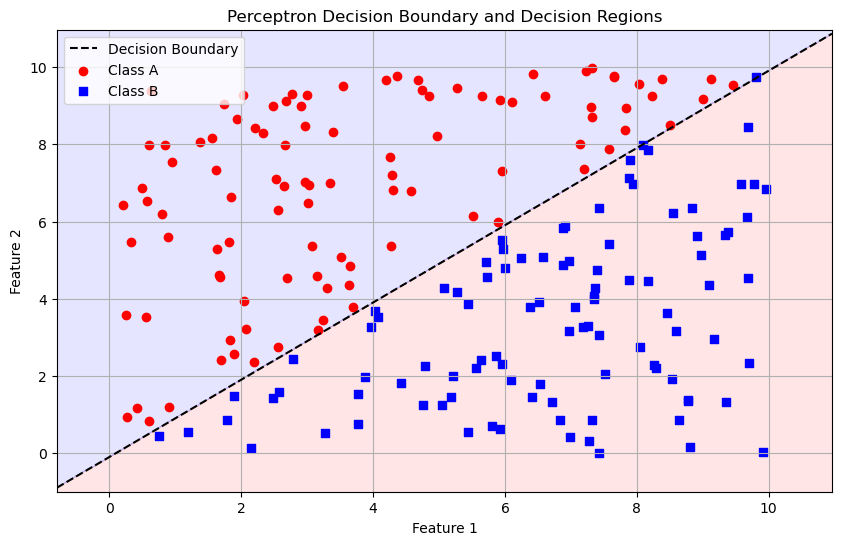

In [22]:
from matplotlib.colors import ListedColormap

x_min, x_max = X_ab[:, 0].min() - 1, X_ab[:, 0].max() + 1
y_min, y_max = X_ab[:, 1].min() - 1, X_ab[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = perceptron.predict(grid)
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
plt.figure(figsize=(10, 6))

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

if perceptron.coef_[0][1] != 0:
    x_vals = np.array([x_min, x_max])
    y_vals = -(perceptron.coef_[0][0] * x_vals + perceptron.intercept_) / perceptron.coef_[0][1]
    plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
else:
    x_val = -perceptron.intercept_ / perceptron.coef_[0][0]
    plt.axvline(x=x_val, color='k', linestyle='--', label='Decision Boundary')

plt.scatter(class_A[:, 0], class_A[:, 1], color='red', marker='o', label='Class A')
plt.scatter(class_B[:, 0], class_B[:, 1], color='blue', marker='s', label='Class B')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary and Decision Regions')
plt.legend()
plt.grid(True)
plt.show()